In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# Loading the list using pickle

### Loading the list with the classes of crossing or not 

In [2]:
# # load the list with classes of crossing or not

# with open("sequences_cross_or_not.txt", "rb") as fp:   # Unpickling
#     sequences = pickle.load(fp)

### Loading the list with all the classes 

In [3]:
# # load the list with all classes

# with open("sequences_10.txt", "rb") as fp:   # Unpickling
#     sequences = pickle.load(fp)

### Loading the list with classes 1 & 4 

In [4]:
# load the list with classes 1 & 4

with open("sequences_1_4.txt", "rb") as fp:   # Unpickling
    sequences = pickle.load(fp)

# Converting the targets into values

### Converting the targets for classifying crossing or not 

In [5]:
# targets = pd.read_csv(r'C:\Users\giorg\target_cross_or_not.csv')
# targets = targets.values

### Converting the targets for all the classes 

In [6]:
# targets = pd.read_csv(r'C:\Users\giorg\target_all.csv')
# targets = targets.values

### Converting the targets for classes 1 & 4 

In [7]:
targets = pd.read_csv(r'C:\Users\giorg\target_1_4.csv')
targets = targets.values

In [8]:
print(len(targets))
print(len(sequences))

10198
10198


In [9]:
targets

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [10]:
sequences

[array([['0.1444', '0.113', '0.1444', '0.113', '0.1251', '0.113',
         '0.1444', '0.113', '0.0722', '0.113', '0.1299', '0.225',
         '0.0337', '0.2157', '0.1299', '0.4024', '0.0144', '0.3371',
         '0.1684', '0.4491', '0.0866', '0.3091', '0.1299', '0.5798',
         '0.0481', '0.5892', '0.2021', '0.7572', '0.0', '0.7946',
         '0.2214', '1.0', '0.231', '1.0'],
        ['0.1383', '0.127', '0.1383', '0.1078', '0.1185', '0.1078',
         '0.1482', '0.1174', '0.079', '0.0982', '0.1432', '0.223',
         '0.0494', '0.2134', '0.1482', '0.386', '0.0', '0.2517', '0.1828',
         '0.434', '0.0741', '0.4628', '0.1383', '0.5683', '0.0692',
         '0.5875', '0.2025', '0.7506', '0.0148', '0.7698', '0.1976',
         '1.0', '0.1976', '1.0'],
        ['0.1753', '0.1202', '0.1804', '0.1202', '0.1553', '0.1202',
         '0.1753', '0.1202', '0.1102', '0.1202', '0.1653', '0.2221',
         '0.0701', '0.2036', '0.1753', '0.3795', '0.0', '0.2869',
         '0.2305', '0.4444', '0.1052

# Split into train-test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

In [12]:
# create validation data

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [13]:
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
#X_val = np.array(X_val).astype('float32')

In [14]:
X_train.shape

(8158, 5, 34)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8158, 5, 34)
(2040, 5, 34)
(8158, 1)
(2040, 1)


## One Hot Encoding for the y_train 

In [16]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

C:\Users\giorg\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
y_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [18]:
onehot_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

## One Hot Encoding for the y_test 

In [19]:
# label_encoder_test = LabelEncoder()
# integer_encoded_test = label_encoder_test.fit_transform(y_test)
# onehot_encoder_test = OneHotEncoder(sparse=False)
# integer_encoded_test = integer_encoded_test.reshape(len(integer_encoded_test), 1)
# onehot_encoded_test = onehot_encoder_test.fit_transform(integer_encoded_test)


In [20]:
# y_test

In [21]:
# onehot_encoded_test

In [22]:
y_train = onehot_encoded
# y_test = onehot_encoded_test

# Start building the model

In [23]:
model = Sequential()
# First SimpleRNN layer with Dropout regularisation  return_sequences=True,
model.add(SimpleRNN(units=100,activation ='relu',return_sequences=True,input_shape=(5,34)))
model.add(Dropout(0.2))
# # Second SimpleRNN layer
model.add(SimpleRNN(units=50,activation ='relu', input_shape=(5,34)))
model.add(Dropout(0.2))
# #Third SimpleRNN layer
# model.add(SimpleRNN(units=64,activation ='relu', input_shape=(5,34)))
# model.add(Dropout(0.1))
# # Fourth SimpleRNN layer
# model.add(SimpleRNN(units=50))
# model.add(Dropout(0.2))
# The output layer
model.add(Dense(2,activation ='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5, 100)            13500     
_________________________________________________________________
dropout (Dropout)            (None, 5, 100)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50)                7550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 21,152
Trainable params: 21,152
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compiling the RNN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
# Fitting to the training set
model.fit(X_train,y_train,epochs=20,batch_size=64) #,validation_data=(X_val, y_val)

Epoch 1/20
128/128 [==============================] - 3s 7ms/step - loss: 0.4990 - accuracy: 0.7421
Epoch 2/20
128/128 [==============================] - 1s 8ms/step - loss: 0.1305 - accuracy: 0.9560
Epoch 3/20
128/128 [==============================] - 1s 8ms/step - loss: 0.1240 - accuracy: 0.9586
Epoch 4/20
128/128 [==============================] - 1s 8ms/step - loss: 0.1032 - accuracy: 0.9648
Epoch 5/20
128/128 [==============================] - 1s 8ms/step - loss: 0.1006 - accuracy: 0.9688
Epoch 6/20
128/128 [==============================] - 1s 8ms/step - loss: 0.0935 - accuracy: 0.9709
Epoch 7/20
128/128 [==============================] - 1s 8ms/step - loss: 0.0949 - accuracy: 0.9700
Epoch 8/20
128/128 [==============================] - 1s 8ms/step - loss: 0.0851 - accuracy: 0.9729
Epoch 9/20
128/128 [==============================] - 1s 8ms/step - loss: 0.0816 - accuracy: 0.9736
Epoch 10/20
128/128 [==============================] - 1s 8ms/step - loss: 0.0840 - accuracy: 0.9735

# Evaluating the model

In [27]:
# test_preds = model.predict_classes(X_test)
test_preds= np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, test_preds)

0.9725490196078431

In [28]:
cf = confusion_matrix(y_test, test_preds)
cf

array([[ 929,   18],
       [  38, 1055]], dtype=int64)

<AxesSubplot:>

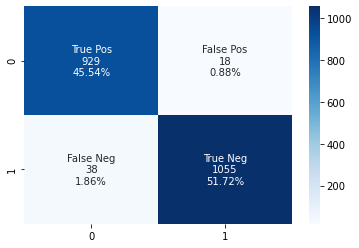

In [29]:
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')